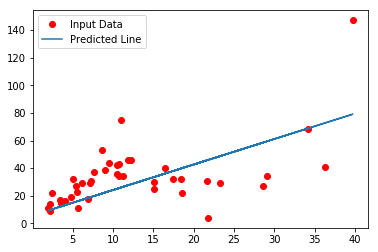

In [56]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import pandas as pd 


rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 50
display_step = 1

file = r'LinearRegression.csv'
df = pd.read_csv(file)
#print df

m =df['X']
p =df['Y']



# Training Data
train_X = numpy.asarray(m)
train_Y = numpy.asarray(p)
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error

cost = tf.reduce_sum(tf.pow(pred-Y, 2))/( n_samples)


# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        total_loss = 0
        for (x, y) in zip(train_X, train_Y):
            sess.run( optimizer, feed_dict={X: x, Y: y})


    
    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Input Data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Predicted Line')
    plt.legend()
    plt.show()

    